In [2]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader.data as web

In [3]:
# Función para descargar precios de cierre ajustados de varios activos a la vez:
def get_closes(tickers, start_date=None, end_date=None, freq=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Frecuencia de muestreo por defecto (freq='d')
    # Importamos paquetes necesarios
    import pandas as pd
    pd.core.common.is_list_like = pd.api.types.is_list_like
    import pandas_datareader.data as web  
    # Creamos DataFrame vacío de precios, con el índice de las fechas
    closes = pd.DataFrame(columns = tickers, index=web.YahooDailyReader(symbols=tickers[0], start=start_date, end=end_date, interval=freq).read().index)
    # Agregamos cada uno de los precios con YahooDailyReader
    for ticker in tickers:
        df = web.YahooDailyReader(symbols=ticker, start=start_date, end=end_date, interval=freq).read()
        closes[ticker]=df['Adj Close']
    closes.index_name = 'Date'
    closes = closes.sort_index()
    return closes

In [6]:
# Información
ticker=['GFINBURO.MX']
start,end='2014-01-01','2019-02-23'
closes=get_closes(ticker,start,end,freq='d')

In [7]:
ret=closes.pct_change().dropna()

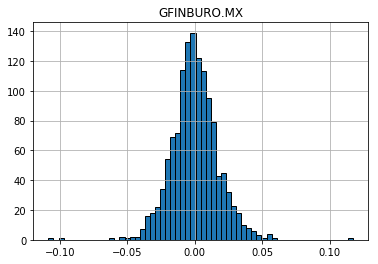

In [8]:
plt.title('GFINBURO.MX')
plt.hist(ret['GFINBURO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()

In [9]:
a2014=ret.iloc[0:250,]
a2015=ret.iloc[250:501,]
a2016=ret.iloc[501:753,]
a2017=ret.iloc[753:1004,]
a2018=ret.iloc[1004:1255,]

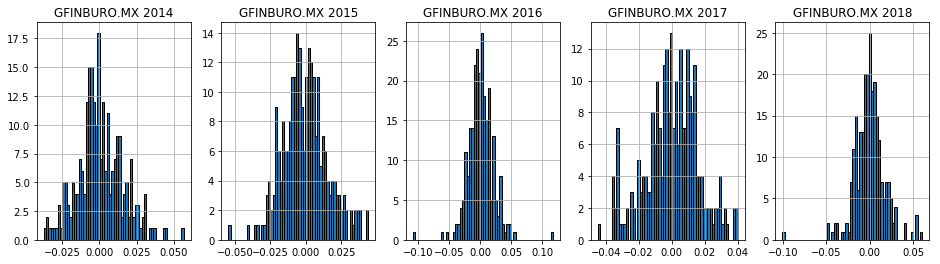

In [10]:
plt.figure(figsize=(16,4))
plt.subplot(151)
plt.title('GFINBURO.MX 2014')
plt.hist(a2014['GFINBURO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(152)
plt.title('GFINBURO.MX 2015')
plt.hist(a2015['GFINBURO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(153)
plt.title('GFINBURO.MX 2016')
plt.hist(a2016['GFINBURO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(154)
plt.title('GFINBURO.MX 2017')
plt.hist(a2017['GFINBURO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.subplot(155)
plt.title('GFINBURO.MX 2018')
plt.hist(a2018['GFINBURO.MX'], bins = 60, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()



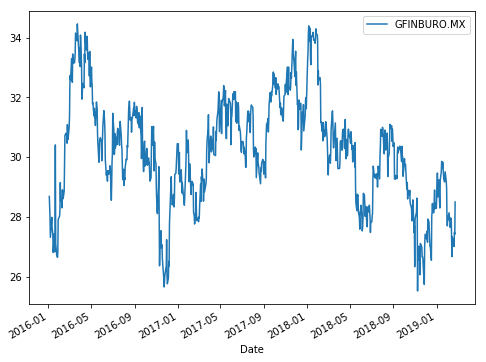

In [11]:
p1618=closes.iloc[502:1293,]
p1618.plot(figsize=(8,6))

### Cambios en los precios


<div class=text-justify> Esta gráfica de precios muestra muchas alzas y bajas en el periodo, se distinquen periodos con tendencia negtiva de mediados de 2016 a inicios del 2017, y de inicios de 2018 a inicios del año siguiente. Los periodos de aumiento del precio están en inicios del 2016, de inicios del 2017 a inicios del 2018, y pareciera que lleva una tendencia positiva iniciando 2019. Todo tiene alta volatilidad.  </div>

In [14]:
ret16=p1618.pct_change().dropna()
ret_sum=pd.DataFrame(index=['Rend diario','Rend anual','Vol diaria','Vol anual'],columns=['2016','2017','2018','Todo'])
list=[a2016,a2017,a2018,ret16]
for x in range (0,4):
    ret_sum.loc['Rend diario'][ret_sum.columns[x]]=list[x]['GFINBURO.MX'].mean()
    ret_sum.loc['Rend anual'][ret_sum.columns[x]]=list[x]['GFINBURO.MX'].mean()*252
    ret_sum.loc['Vol diaria'][ret_sum.columns[x]]=list[x]['GFINBURO.MX'].std()
    ret_sum.loc['Vol anual'][ret_sum.columns[x]]=list[x]['GFINBURO.MX'].std()*np.sqrt(252)
ret_sum

,2016,2017,2018,Todo
Rend diario,0.000298883,0.000279538,-0.00028376,0.000156412
Rend anual,0.0753186,0.0704436,-0.0715074,0.0394159
Vol diaria,0.0206226,0.0161,0.0178444,0.0181433
Vol anual,0.327373,0.255579,0.283271,0.288017


### Discusión datos tabla


<div class=text-justify> Como se mecionó en la gráfica, todas las volatilidades anuales son alyas, en comparación con sus rendimientos que no son altos. 2018 muestra un rendimiento negativo, al igual que las otras 4 acciones analizadas.  </div>

In [15]:
ret18=ret.iloc[1004:1293,]
ret_sum=pd.DataFrame(index=['Mean','Volatility'],columns=ticker)
ret_sum.loc['Mean']=ret18.mean()
ret_sum.loc['Volatility']=ret18.std()
n=1000
for x in range (0,3):
    mu= ret_sum['GFINBURO.MX']['Mean']
    sigma= ret_sum['GFINBURO.MX']['Volatility']
    s0=28.5
    listaepsilon = [np.random.randn() for _ in range(n)]
    epsilons = np.asarray(listaepsilon)
    epsilon = pd.DataFrame(columns = ['Epsilon', 'st1','st10','st30','st252'])
    epsilon['Epsilon']= epsilons
    epsilon['st1']= s0*np.exp((mu*.5*sigma**2)*1+sigma*np.sqrt(1)*epsilons)
    epsilon['st10']= s0*np.exp((mu*.5*sigma**2)*10+sigma*np.sqrt(10)*epsilons)
    epsilon['st30']= s0*np.exp((mu*.5*sigma**2)*30+sigma*np.sqrt(30)*epsilons)
    epsilon['st252']= s0*np.exp((mu*.5*sigma**2)*252+sigma*np.sqrt(252)*epsilons)
    st=pd.DataFrame(index=['Mean','liminf','limsup'],columns=epsilon.columns)
    st.loc['Mean']=epsilon.mean()
    st.loc['liminf']=epsilon.min()
    st.loc['limsup']=epsilon.max()
    st=st.drop('Epsilon',1)
    print(st)
    n=n*10

            st1     st10     st30    st252
Mean       28.5  28.5305  28.6091  29.5609
liminf  26.3122  22.1387  18.4014   8.0202
limsup  29.9951  33.5016  37.7113  64.1725
            st1     st10     st30    st252
Mean    28.5103  28.5625  28.6639  29.7197
liminf   26.749  23.3219   20.138   10.416
limsup  30.5253  35.4103  41.5098  84.7513
            st1     st10     st30    st252
Mean    28.5032  28.5406  28.6267  29.6206
liminf  26.1514  21.7136  17.7938  7.27652
limsup  30.6291  35.7924  42.2886  89.4429


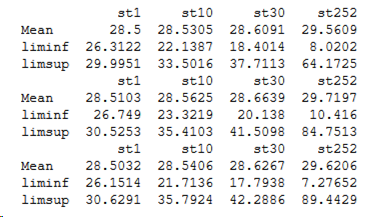